In [4]:
# standard python utilities
import os
import sys
import glob
import pandas as pd
import numpy as np
import calendar
import time

# standard python plotting utilities
import matplotlib as mpl
import matplotlib.pyplot as plt

# standard geospatial python utilities
import pyproj # for converting proj4string
import shapely
import geopandas as gpd
import rasterio

# mapping utilities
import contextily as ctx
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

# modflow utility 
import flopy
import flopy.utils.binaryfile as bf


In [5]:

## Set up directory referencing
# Package data
git_dir = os.path.dirname(os.path.dirname(os.getcwd()))
git_dir = os.getcwd()
while os.path.basename(git_dir) != 'CosumnesRiverRecharge':
    git_dir = os.path.dirname(git_dir)
gwfm_dir = '\\'.join(str.split(git_dir,'\\')[0:3])+ '/Box/research_cosumnes/GWFlowModel'
print(git_dir, gwfm_dir)

C:\Users\andrewc\Documents\GitHub\CosumnesRiverRecharge C:\Users\andrewc/Box/research_cosumnes/GWFlowModel


In [49]:
# set box directory for output figures and data
box_dir = gwfm_dir+'/Levee_setback/levee_setback_distance_analysis/'
fig_dir = box_dir+'figures/'
data_dir = box_dir+'data_output/'
gis_dir = data_dir+'GIS/'

In [7]:
ext_dir = 'F:/WRDAPP'
c_dir = 'C:/WRDAPP'

if os.path.exists(ext_dir):
    loadpth = ext_dir 
elif os.path.exists(c_dir):
    loadpth = c_dir 

loadpth = loadpth +'/GWFlowModel/Cosumnes/levee_setback/'
model_ws = loadpth+'flood_depth_analysis'

In [8]:
nrow = 100
ncol = 230
nlay = 3
delr = 200
delc = 200

# # m = flopy.modflow.Modflow(modelname = 'MF', exe_name = 'MODFLOW-NWT.exe', 
# #                           version = 'mfnwt', model_ws=model_ws)
# m = flopy.modflow.Modflow(modelname = 'MF', exe_name = 'mf2005', 
#                           version = 'mf2005', model_ws=model_ws)
# #lenuni = 1 is in ft, lenuni = 2 is in meters
# # itmuni is time unit 5 = years, 4=days, 3 =hours, 2=minutes, 1=seconds
# dis = flopy.modflow.ModflowDis(nrow=nrow, ncol=ncol, 
#                                nlay=nlay, delr=delr, delc=delc,
#                                model=m, lenuni = 2, itmuni = 4,
#                                xul = xul, yul = yul,rotation=rotation, proj4_str=proj4_str,
#                               nper = nper, perlen=perlen, nstp=nstp, steady = steady,
#                               start_datetime = strt_date)


In [9]:
# burn river shapefile into the 10 meter dem and then read it out to find the cells where it is
from flopy.utils import Raster
# Full size dem of northern sac valley
raster_name = gwfm_dir+"/DEM_data/USGS_ten_meter_dem/modeldomain_10m_transformed.tif"

# rio10_utm = Raster.load(raster_name)
rio10_utm = rasterio.open(raster_name)
dem_10m = rio10_utm.read((1,))

In [10]:
# load sacramento river, creeks
rivers = gpd.read_file(gwfm_dir+'/SFR_data/Sac_valley_rivers/Sac_valley_rivers.shp')

C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'MultiLineString'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out


In [11]:
m_domain = gpd.read_file(gwfm_dir+'\\NewModelDomain\\GWModelDomain_52_9deg_UTM10N_WGS84.shp')


C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out


In [12]:
cr = gpd.overlay(rivers.loc[rivers.GNIS_Name=='Cosumnes River'].to_crs('epsg:32610'), m_domain)

C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207

C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207

In [13]:
from shapely.geometry import MultiLineString, LineString, Point, shape, mapping
from shapely.ops import linemerge
import fiona

cr_line = MultiLineString(cr.geometry.values)

In [ ]:
buf_sfr = grid_sfr.copy()
setbacks = np.arange(0, 3400,200)
str_setbacks = np.zeros((len(setbacks),m.dis.nrow,m.dis.ncol))
# str_setbacks_local = np.zeros((len(setbacks),m.dis.nrow,m.dis.ncol))

# grid_sfr.plot()
for n in np.arange(0,len(setbacks)):
    buf_sfr.geometry = grid_sfr.buffer(setbacks[n])
    grid_sfr_buf = gpd.sjoin(grid_p,buf_sfr, how='right', lsuffix = 'grid', rsuffix = 'sfr',op='within')
    grid_sfr_buf = grid_sfr_buf.drop_duplicates('node_x')
    # clip to local setback sites
    grid_sfr_buf_clipped = gpd.sjoin(grid_sfr_buf,local_setback, op='intersects',how='right')
    # individually identify local setback sites in arrays
    for t in np.arange(0,3):
        clip_vals = grid_sfr_buf_clipped.loc[grid_sfr_buf_clipped.id==t+1,:]
#         str_setbacks_local[n,clip_vals.row_x.values-1,clip_vals.column_x.values-1] = t+1
    str_setbacks[n, grid_sfr_buf.row_x.values-1,grid_sfr_buf.column_x.values-1] = 1


### Parallel XS

In [448]:


geom = shape(cr_line)

# # length of the LineString
length = int(geom.length)
sfr_sp = gpd.GeoDataFrame(pd.DataFrame(np.zeros((length,1)),columns=['id']))
sfr_sp['geometry'] = shapely.geometry.Point(0,0)
# enumerate keeps track of the count in addition to the object being iterated on
for i, distance in enumerate(range(0, length, 1)):
    point = geom.interpolate(distance)
    sfr_sp.loc[i,'geometry'] = point
    sfr_sp.loc[i,'id'] = i

In [449]:
sfr_sp['Easting'] = sfr_sp.geometry.x.values
sfr_sp['Northing'] = sfr_sp.geometry.y.values

point = sfr_sp.loc[:,['Easting','Northing']].values

with rasterio.open(raster_name) as src:
    sfr_sp['z_ft'] = [sample[0] for sample in src.sample(point)]
    
sfr_sp['z_m'] = sfr_sp.loc[:,'z_ft']*0.3048


Find XS every 1000 meters avoids too much overlap in XS, but after calculating depth there is some discontinuity, so more might be better

In [450]:
geom = linemerge(cr.geometry.values)
# geom = geom.simplify(10)
# how often to interpolate a point, 200 m matches model grid
dline = 1000
# # length of the LineString
length = int(geom.length)
# max width needed is 3200 m
xs_width = 3200*2

num_xs = np.floor(length/dline).astype(int)
transects = pd.DataFrame(np.zeros((num_xs,1)), columns = ['line'])
transects['geometry'] = LineString([(0,0),(0,1)]) #initiate LineString geometry column


for i, distance in enumerate(range(0, int(length), dline)):
    short_line = LineString([geom.interpolate(distance),geom.interpolate(distance+dline)])
    geom_left = short_line.parallel_offset(xs_width/2,'left', resolution = 32, join_style = 2)
    geom_right = short_line.parallel_offset(xs_width/2,'right', resolution = 32, join_style = 2)
    perp_line = LineString([geom_left.boundary[1], geom_right.boundary[0]])
    transects.loc[i,'geometry'] = perp_line

<AxesSubplot:>

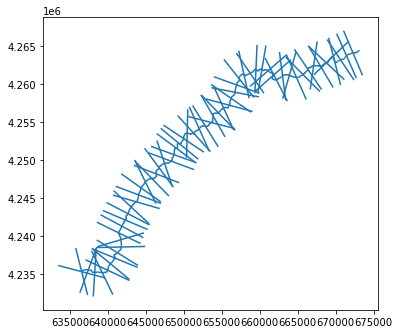

In [451]:
transg = gpd.GeoDataFrame(transects)
transg = transg.drop_duplicates('geometry')
transg['line'] = np.arange(0,len(transg))
# check cross section lines are paralle
fig,ax=plt.subplots(figsize=(6,6))
transg.plot(ax=ax)
cr.plot(ax=ax)


In [452]:
# # how often to interpolate a point in a XS
dline = 10

xs_all = gpd.GeoDataFrame(pd.DataFrame(columns=['xs_num','dist_from_right_m','geometry']))


for j in np.arange(0,len(transg)):
    xs = gpd.GeoDataFrame(pd.DataFrame(np.zeros((int(xs_width/dline),2)), columns=['xs_num','dist_from_right_m']))
    xs['geometry'] = Point([(0,0)])
    xs['xs_num'] = j
    
    # pick one geometry at a time
    geom = transg.iloc[j].geometry

    # # # length of the LineString
    length = int(geom.length)
    # create discrete points for each lien
    for i, distance in enumerate(range(0, int(length), dline)):
        point = geom.interpolate(distance)
        xs.loc[i,'geometry'] = point
        xs.loc[i,'dist_from_right_m'] = i
    # append individual cross section to all dataframe
    xs_all = xs_all.append(xs)

In [458]:
xs_all.crs='epsg:32610'
xs_all['Easting'] = xs_all.geometry.x
xs_all['Northing'] = xs_all.geometry.y
point = xs_all.loc[:,['Easting','Northing']].values

with rasterio.open(raster_name) as src:
    xs_all['z_ft'] = [sample[0] for sample in src.sample(point)]

xs_all['z_m'] = xs_all.loc[:,'z_ft']*0.3048
# convert distance from right from 1/10 of meters because points were every 10 meters
# the distance was set with the index but really it should be 3200 meters not just 320 meters
xs_all.dist_from_right_m *= 10


IndexError: index 0 is out of bounds for axis 2 with size 0

## XS Cleaning
There isn't going to be a clear way to distinguish the levees and the XS shows bumpiness. The best solution will be to assume that levee setback will involve a cut and fill approach such that the ground surface elevation after setback is the mean of the elevation from before, but then this won't allow variable flooding based on elevation...

It will take looking at the XS in different regions.
It might be doable to fill in the channel as Sierra suggested which would raise the river above the levee and then install new "levee walls" at the desired distance. Filling in just the channel requires: 1. Going to the center line 2. go out some distance to account for channel width 3. set those values as a fraction of the levee height to insure more overbank flooding

In [ ]:
# remove any NA values picked up from DEM raster
xs_all.loc[xs_all['z_ft'] == xs_all.z_ft.min(), ['z_ft','z_m']] = np.nan
xs_all.index = np.arange(0,len(xs_all))
xs_all.drop(['geometry'],axis=1).to_csv('XS_point_elevations.csv')

# convert to dataframe for easier plotting
xs_all_df = pd.DataFrame(xs_all)
# pivot based on XS number and save only elevation in z_m
xs_all_df = xs_all_df.pivot_table(index='dist_from_right_m',columns='xs_num',values='z_m')
xs_all_df.to_csv('Elevation_by_XS_number_meters.csv')

In [ ]:

xs_all_df.plot()
plt.legend(ncol=4, loc=(1,0.01), title='XS Number')


The process will be too complicated too directly edit the raster, so individual cross-sections will be edited by applying a rolling mean in the floodplain in the 200-400 m around the main channel to "flatten" any levee like structure. Then new 'levee walls' will be placed at the desired setback distance.


It doesn't look like I will see much floodplain inundation, but I won't know until I estimate depth. Start by assuming 2000 cfs is 2-3 year and 10,000 cfs is the 20 yr??

In [22]:
# 40 observations is equal to 400 meters
xs_levee_smooth = xs_all_df.copy()
roll_window = 40
xs_roll_mean = xs_all_df.rolling(roll_window, center=True).mean()
channel_middle = int(len(xs_all_df)/2)*10
channel_bool = (xs_all_df.index >= channel_middle - (roll_window*10/2))& (xs_all_df.index <= channel_middle + (roll_window*10/2))
xs_levee_smooth.loc[channel_bool,:] = xs_roll_mean.loc[channel_bool,:]


In [428]:
xs_levee_smooth

xs_num                    0          1          2          3          4   \
dist_from_right_m                                                          
0.0                      NaN        NaN        NaN  25.994823  17.433828   
10.0                     NaN        NaN        NaN  25.886850  17.358046   
20.0                     NaN        NaN        NaN  25.886850  17.327129   
30.0                     NaN        NaN        NaN  25.806435  17.620701   
40.0                     NaN        NaN        NaN  25.931959  17.931225   
...                      ...        ...        ...        ...        ...   
3150.0             39.984482  36.789886  32.489468  26.265772  31.623293   
3160.0             39.919178  36.776905  32.489468  26.579870  32.298107   
3170.0             39.962715  36.796303  32.340557  27.305588  33.293583   
3180.0             39.683891  36.858467  32.582020  27.473368  33.570267   
3190.0             39.778183  36.921612  32.892952  27.692333  33.570267   

xs_num                    5          6          7          8          9   ...  \
dist_from_right_m                                                         ...   
0.0                28.223585  26.982557  13.613771  14.830894  14.710082  ...   
10.0               28.247797  27.064447  13.689334  14.788519  14.722852  ...   
20.0               28.240013  27.125111  13.809900  14.829920  14.744096  ...   
30.0               28.256641  27.198816  13.906653  14.977717  14.901140  ...   
40.0               28.256641  27.208385  13.883801  15.193238  14.790626  ...   
...                      ...        ...        ...        ...        ...  ...   
3150.0             25.513292  22.097803  23.510397  17.615946  12.367088  ...   
3160.0             25.454151  22.013098  23.325621  17.679865  12.533971  ...   
3170.0             25.504065  21.935827  23.274837  17.858059  12.580573  ...   
3180.0             25.449526  22.031006  23.264050  17.973566  12.615774  ...   
3190.0             25.494699  22.031006  23.300018  17.962606  12.615774  ...   

xs_num                   52        53        54        55        56        57  \
dist_from_right_m                                                               
0.0                2.429272  2.374250  2.318478  2.081845  1.623056  1.351477   
10.0               2.425243  2.375327  2.301710  2.083229  1.617303  1.315931   
20.0               2.431159  2.374139  2.308978  2.065783  1.654342  1.484563   
30.0               2.455829  2.402242  2.274983  2.053001  1.649245  1.440992   
40.0               2.481876  2.375135  2.273600  2.053065  1.680959  1.381211   
...                     ...       ...       ...       ...       ...       ...   
3150.0             1.503787  1.625194  1.224238  1.082311  1.130480  0.822568   
3160.0             1.503273  1.625194  1.223374  1.089056  1.099182  0.822568   
3170.0             1.503273  1.625194  1.224253  1.077362  1.092919  0.835566   
3180.0             1.503273  1.625194  1.224482  1.082969  1.083518  0.844410   
3190.0             1.503273  1.625194  1.222801  1.054418  1.188065  0.858124   

xs_num                   58        59        60        61  
dist_from_right_m                                          
0.0                1.652985       NaN       NaN  0.840201  
10.0               1.268444       NaN       NaN  0.820903  
20.0               1.093557       NaN       NaN  0.781897  
30.0               1.072783       NaN       NaN  0.794005  
40.0               1.092762       NaN       NaN  0.803062  
...                     ...       ...       ...       ...  
3150.0             0.815950  1.492038  1.071270  0.657418  
3160.0             0.815950  1.478190  1.067945  0.657224  
3170.0             0.825385  1.424198  1.068665  0.654009  
3180.0             0.830968  1.421501  1.062527  0.655446  
3190.0             0.837412  1.413756  1.068831  0.669639  

[320 rows x 62 columns]

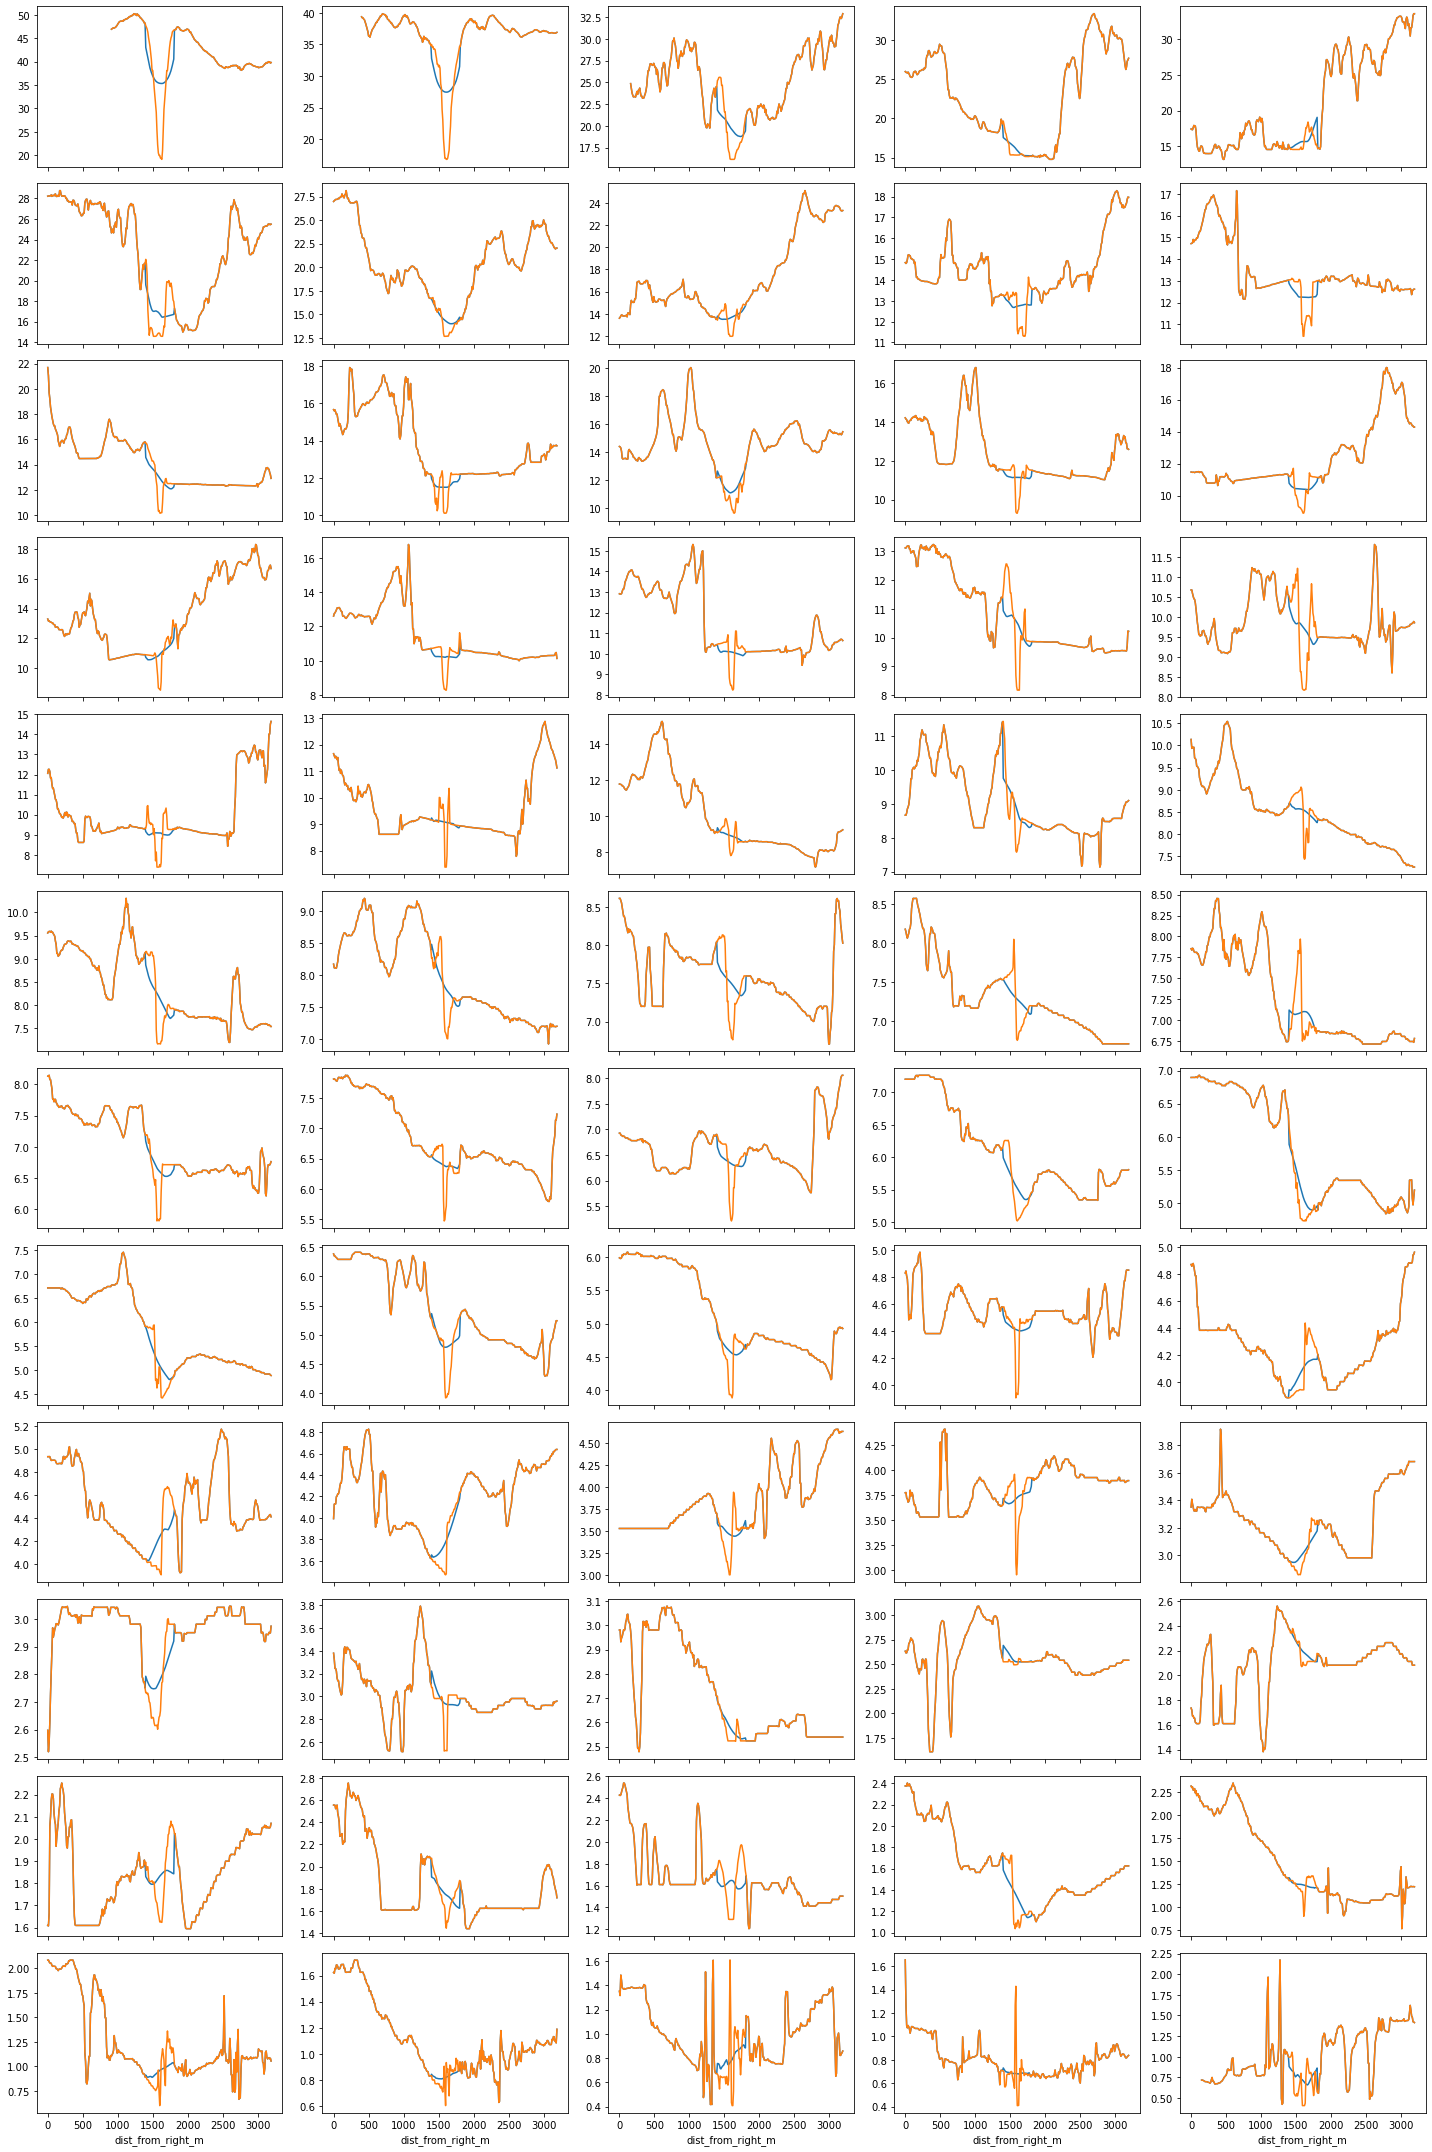

In [23]:
nx,ny = 12,5
fig,ax = plt.subplots(nx,ny, figsize=(20,30),sharex=True)
n=0
for i in np.arange(0,nx):
    for j in np.arange(0,ny):
        xs_levee_smooth.iloc[:,n].plot(ax=ax[i,j])
        xs_all_df.iloc[:,n].plot(ax=ax[i,j])
        n+=1
fig.tight_layout()

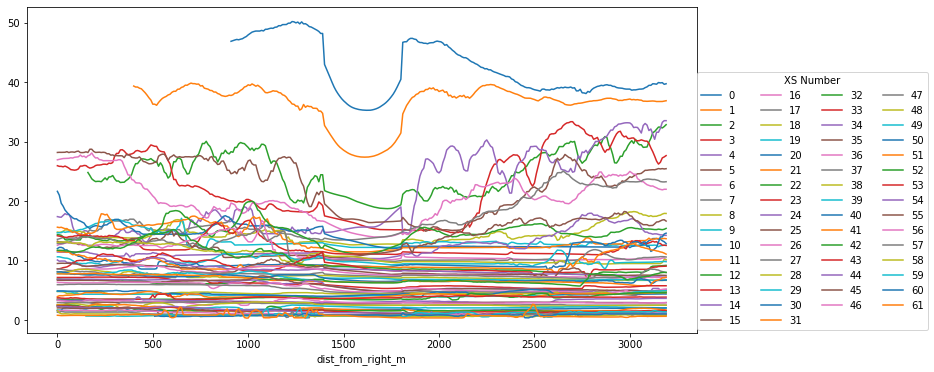

In [25]:
fig,ax = plt.subplots(figsize=(12,6))

xs_levee_smooth.plot(ax=ax)
ax.legend(ncol=4, loc=(1,0.01), title='XS Number')


In [26]:
# import pprint
# import rasterio
# from rasterio import features

### Plan to create setback XS
1. Load DEM and sample XS for frequent intervals and review
2. Try removing the levee from just the XS 
3. Add new 'levee wall' at desired setback distance
4. If code isn't fluid enough to alter XS then look at altering DEM, but altering XS should be easier (1D vs 2D)

In [27]:
# ma_dem_10m = np.ma.masked_where(dem_10m==dem_10m.min(), dem_10m)
# plt.imshow(ma_dem_10m[0,:,:])

In [28]:
# image = features.rasterize(
#             ((g, v) for g, v in zip(cr.geometry.values, -99.99*np.ones(len(cr)))),
#             out_shape=rio10_utm.shape, all_touched=True, transform=rio10_utm.transform)

## Raster elevation calculations
1. Keep in raster format and making changes as you sample
2. Convert to array and work from it with a grid reference file

In [29]:
# from shapely.geometry import Polygon
# vertices = list(m_domain.geometry.values[0].exterior.coords)[0:4]
# geoms = Polygon(vertices)

# rio10_utm.plot()
# t0 = time.time()
# rio10_utm.crop(vertices, invert=False)
# crop_time = time.time() - t0
# rio10_utm.plot()


In [342]:
# dem data for cropping above land surface
dem_data = np.loadtxt(gwfm_dir+'/DIS_data/dem_52_9_200m_linear.tsv')

In [31]:
# grid_sfr = gpd.read_file(gwfm_dir+'/SFR_data/final_grid_sfr/grid_sfr.shp')
# grid_p = gpd.read_file(gwfm_dir+'/DIS_data/grid/grid.shp')

In [32]:
# buf_sfr = grid_sfr.copy()
# setbacks = np.arange(0, 3400,200)
# str_setbacks = np.zeros((len(setbacks),nrow,ncol))
# # grid_sfr.plot()
# for n in np.arange(0,len(setbacks)):
#     buf_sfr.geometry = grid_sfr.buffer(setbacks[n])
#     grid_sfr_buf = gpd.sjoin(grid_p,buf_sfr, how='right', lsuffix = 'grid', rsuffix = 'sfr',op='within')
#     grid_sfr_buf = grid_sfr_buf.drop_duplicates('node_x')
#     str_setbacks[n, grid_sfr_buf.row_x.values-1,grid_sfr_buf.column_x.values-1] = 1


# Mannings equation
The assumption of levee setback is that as the setback distance increases so does the wetted xs perimeter which increases the hydraulic radius (there is more roughness impacting the water) so the velocity will be lower. This analysis is independent of varying geology, and river reach under the assumption that any recontoured reach would undergo restoration resulting in similar reach rougnesses of the floodplain (small bushes, trees). And it will assume the existing average bed slope of the lower Cosumnes river applies.  
This analysis could be done by running a HEC-RAS model at all of these different setback distances, but here the goal is to determine the trend and general distance at which diminishing returns occur.  The analysis will be completed first for a typical winter flood event of 2,000 cfs which is near floodplain connectivity (need to approximate area and velocity of channel as starting point or else will need to cycle through several areas/wetted perimeters - better to just use multiple areas that connect to multiple possibles flood sizes )  
The width will range from 0 to 3200 meters in both direction but I coud have depth be dependent on the actual elevations

$ Q = VA = (\frac{1.00}{n}) A  {R}^{2/3} \sqrt{S} $  
$ R = \frac{A}{Wp}$  
hydraulic radius r is XS area divided by wetted perimeter  
[Manning's eqn reference](http://www.fsl.orst.edu/geowater/FX3/help/8_Hydraulic_Reference/Manning_s_Equation.htm)  
Avg manning's n for in channel is 0.048  - clean, winding, some pools and shoals, but some weeds and stones, lower stages, more ineffective, slopes and sections
Floodplains have much broader range, due to variability in vegetation type: tall grass is 0.035 but dense willows is 0.15  
[Manning's n reference](http://www.fsl.orst.edu/geowater/FX3/help/8_Hydraulic_Reference/Mannings_n_Tables.htm)  

Slope for Cosumnes could be considered the 0.0006 which is the mean for all reaches

In [33]:
grid_sfr = gpd.read_file(gwfm_dir+'/SFR_data/final_grid_sfr/grid_sfr.shp')
grid_p = gpd.read_file(gwfm_dir+'/DIS_data/grid/grid.shp')

C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array

C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
# Q_cfs = 2000 # discharge is 2000 cfs, roughly 2-3 yr event
# Q_cfs = 10000 # discharge is 10,000 cfs, roughly 10-20 yr event
Q_cfs = 20000 # discharge is 20,000 cfs, 

Q_cms = Q_cfs*(0.3048**3)

# will need to iterative solve for Area
# nwt technique with derivative, solving for depth
# area is the sum of area between depth and ground surface

In [35]:
def mannings(x, Q, xs_elevs):
    d = x
    n = 0.048
    S = 0.001  
    wse = xs_elevs.min()+d
    xs_wet = wse - xs_elevs
    xs_wet[xs_wet < 0] = 0
    # multiply by 10m to get area and sum for area
    A = xs_wet.sum() * 10
    # calculate wetted perimeter
    xy = xs_elevs[wse - xs_elevs > 0]
    Wp = np.sum(np.sqrt(np.diff(xy.values)**2 + np.diff(xy.index.values)**2))
    Q_calc = (np.sqrt(S)/n) * (A**(5/3)) / (Wp**(2/3))
    f0 = abs(Q_calc - Q)
    return(f0)

In [36]:
from scipy.optimize import fsolve, least_squares, minimize, minimize_scalar
# fsolve(mannings, [2], args = (Q_cms, xs_elevs), xtol=1E-5)
# least_squares(mannings, [2], args = (Q_cms, xs_elevs), bounds = (0, 10), ftol=1E-5)
# minimize(mannings, [1.], args = (Q_cms, xs_elevs), bounds=[(0,10)], tol=1E-5)

# # res = minimize_scalar(mannings,  args = (Q_cms, xs_elevs), bounds=(0,10), method='bounded')
# res

In [37]:
depths = np.zeros(xs_levee_smooth.shape[1])
for nseg in np.arange(0,xs_levee_smooth.shape[1]):
    res = minimize_scalar(mannings,  args = (Q_cms, xs_levee_smooth.iloc[:,nseg]), bounds=(0,10), method='bounded')
    depths[nseg] = res.x

In [38]:
# depths20k = np.copy(depths)
# depths2k = np.copy(depths)

In [40]:
# depths20k - depths
# np.median((depths20k - depths)/((depths20k+ depths)/2)*100)
# np.median(abs((depths2k - depths)/((depths20k+ depths)/2)*100))

<AxesSubplot:xlabel='river_km'>

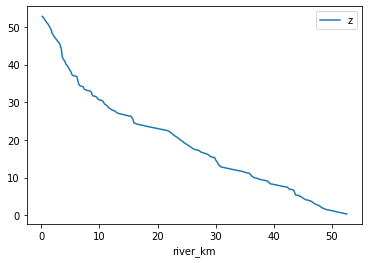

In [378]:
# grid_sfr.length_m

In [389]:
# raster_name
# with rasterio.open(raster_name) as src:
#      dem = src.read(1, masked=True)
rio10_utm.read(1,masked=True)
# dem_10m

masked_array(
  data=[[--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        ...,
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --],
        [--, --, --, ..., --, --, --]],
  mask=[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],
  fill_value=-3.402823e+38,
  dtype=float32)

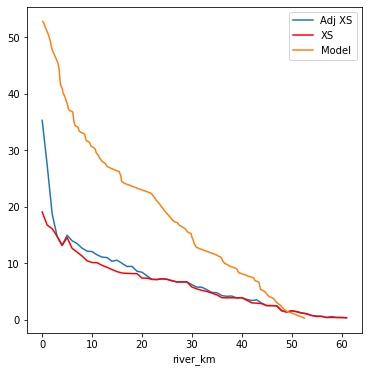

In [384]:
fig,ax=plt.subplots(figsize=(6,6))
xs_levee_smooth.min().plot(ax=ax, label='Adj XS')
xs_all_df.min().plot(ax=ax, color='red',label='XS')
grid_sfr.assign(river_km = np.cumsum(grid_sfr.length_m/1000)).plot(x='river_km',y='z',kind='line',ax=ax, label='Model')
plt.legend()

 0.00024 is the slope which matches the mean slope of the streambed


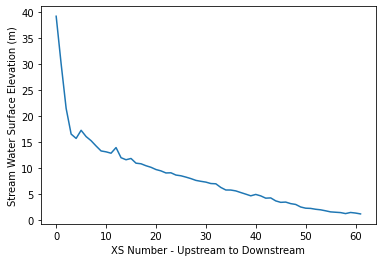

In [41]:
plt.plot(xs_levee_smooth.min()+depths)
plt.xlabel('XS Number - Upstream to Downstream')
plt.ylabel('Stream Water Surface Elevation (m)')

print(' %.5F is the slope' % (15/(62*1000)), 'which matches the mean slope of the streambed')

plt.savefig('water surface elevation profile (m) at' + str(Q_cfs)+'cfs.png')

Text(0, 0.5, 'Stream Depth (m)')

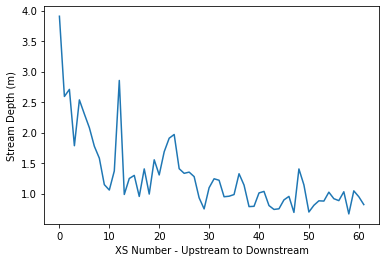

In [42]:
plt.plot(depths)
plt.xlabel('XS Number - Upstream to Downstream')
plt.ylabel('Stream Depth (m)')
# plt.savefig('Depth profile (m) at' + str(Q_cfs)+'cfs.png')

### Interpolate WSE over model grid

In [43]:
wse_all = pd.DataFrame(xs_levee_smooth.min()+depths, columns=['wse_m'])
wse_interp = xs_all.join(wse_all, on='xs_num')
# wse_interp.geometry = wse_interp.buffer(10)

In [44]:
wse_grid = gpd.sjoin(wse_interp, grid_p, how='left', op='within')
# wse_grid = gpd.sjoin(grid_p, wse_interp,  how='left', op='overlaps')

print(wse_grid.node.isna().sum(), 'nodes are NAs when joining grid, most likely due to values near top of domain')
wse_grid = wse_grid.dropna(subset=['node'])

214 nodes are NAs when joining grid, most likely due to values near top of domain


In [50]:
# write WSE and depth points to shapefile for back up and load before raster creation
# wse_interp.to_file(gis_dir+ 'wse_depth_points_'+str(Q_cfs)+'.shp')

C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


# Messy code trying to interpolate flood depth

In [407]:
wse_interp

xs_num  dist_from_right_m                        geometry  \
0          0                0.0  POINT (672915.408 4262640.411)   
1          0               10.0  POINT (672911.500 4262649.615)   
2          0               20.0  POINT (672907.592 4262658.820)   
3          0               30.0  POINT (672903.683 4262668.025)   
4          0               40.0  POINT (672899.775 4262677.229)   
...      ...                ...                             ...   
19835     61             3150.0  POINT (635049.415 4235710.909)   
19836     61             3160.0  POINT (635039.750 4235713.478)   
19837     61             3170.0  POINT (635030.086 4235716.048)   
19838     61             3180.0  POINT (635020.422 4235718.618)   
19839     61             3190.0  POINT (635010.758 4235721.187)   

             Easting      Northing      z_ft       z_m      wse_m  \
0      672915.408286  4.262640e+06       NaN       NaN  39.219989   
1      672911.500014  4.262650e+06       NaN       NaN  39.219989   
2      672907.591742  4.262659e+06       NaN       NaN  39.219989   
3      672903.683470  4.262668e+06       NaN       NaN  39.219989   
4      672899.775198  4.262677e+06       NaN       NaN  39.219989   
...              ...           ...       ...       ...        ...   
19835  635049.414501  4.235711e+06  2.156884  0.657418   1.191144   
19836  635039.750259  4.235713e+06  2.156246  0.657224   1.191144   
19837  635030.086017  4.235716e+06  2.145698  0.654009   1.191144   
19838  635020.421775  4.235719e+06  2.150413  0.655446   1.191144   
19839  635010.757533  4.235721e+06  2.196978  0.669639   1.191144   

                   x             y  
0      672915.408286  4.262640e+06  
1      672911.500014  4.262650e+06  
2      672907.591742  4.262659e+06  
3      672903.683470  4.262668e+06  
4      672899.775198  4.262677e+06  
...              ...           ...  
19835  635049.414501  4.235711e+06  
19836  635039.750259  4.235713e+06  
19837  635030.086017  4.235716e+06  
19838  635020.421775  4.235719e+06  
19839  635010.757533  4.235721e+06  

[19840 rows x 10 columns]

In [212]:
# m_domain = gpd.read_file(gwfm_dir+'\\NewModelDomain\\GWModelDomain_52_9deg_UTM10N_WGS84.shp')
# domain_buffered = gpd.GeoDataFrame(data = m_domain, geometry = m_domain.buffer(buffer))
grid_wse = gpd.sjoin(wse_interp, grid_p)

In [220]:
grid_wse_mean = grid_wse.dissolve(by = 'node',aggfunc='mean')

C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207

C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207

C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = pd.Series(data, index=index, name=name, **kwargs)
C:\Users\andrewc\Anaconda3\envs\geosp\lib\site-packages\geopandas\geoseries.py:207

In [ ]:
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging
from rasterio.transform import Affine

# define function to interpolate/krige water surface elevations
# part 1/2
def lin_krige(filename, param, res, flow, out_dir):
    '''filename of shapefiles with water surface elevation points
     raster resolution for kriging and output'''
    # Kriging set up
    df = gpd.read_file(filename)
    df = df.dropna(subset=[param])
    
    x = df.geometry.x.values
    y = df.geometry.y.values
    z = df[param].values
    gridx = np.arange(np.min(x), np.max(x), res)
    gridy = np.arange(np.min(y), np.max(y), res)
    
    # Kriging
    # linear, gaussian, spherical, exponential, hole-effect and power
    OK = OrdinaryKriging(
        x,y, z,
        variogram_model="linear",
        verbose=True,
        enable_plotting=True,
    #     exact_values = False,
        enable_statistics = True,
        nlags = 50
    )

    # z is the kriged grid and ss is the variance grid (sigma ^2)
    z, ss = OK.execute("grid", gridx, gridy)
    # flip data because np sets 0,0 in top left while raster is bottom left
    Z  = np.flip(z.data,axis = 0)
    SS = np.flip(ss.data,axis = 0)
    
    transform = Affine.translation(np.min(x) - res / 2, np.max(y) - res / 2) * Affine.scale(res, -res)
    
    # Output file creation
#     new_dataset1 = rasterio.open(out_dir+'/interpolated_flood_depths/'+param+'_at_'++str(flow)+'_kriged.tif',
#                            'w',driver = 'GTiff',
#                            height=Z.shape[0], width = Z.shape[1],
#                            count = 1, dtype = Z.dtype,
#                            crs = df.crs,
#                            transform = transform)

#     new_dataset1.write(Z,1)
#     new_dataset1.close()

#     new_dataset2 = rasterio.open(out_dir+'/interpolated_flood_depths/'+param+'_at_'+str(flow)+'_variance.tif',
#                                'w',driver = 'GTiff',
#                                height=Z.shape[0], width = Z.shape[1],
#                                count = 1, dtype = Z.dtype,
#                                crs = df.crs,
#                                transform = transform)

#     new_dataset2.write(SS,1)
#     new_dataset2.close()
    return(Z, SS)

In [208]:
from scipy import interpolate

param='z_m'
df = gpd.read_file(filename)
df = df.dropna(subset=[param])
#     df = df.to_crs('epsg:32610')
    
#     df = gpd.sjoin(df,domain_buffered, op = 'within', how = 'inner')
res=200
x = df.geometry.x.values
y = df.geometry.y.values
z = df[param].values
gridx = np.arange(np.min(x), np.max(x), res)
gridy = np.arange(np.min(y), np.max(y), res)

f = interpolate.interp2d(x, y, z, kind='linear')

In [336]:
x = (grid_wse_mean.row-1).values
y = (grid_wse_mean.column-1).values
z = grid_wse_mean.z_m.values
gridx = np.arange(0,ncol, dtype=float)
gridy = np.arange(0,nrow, dtype=float)
points = np.transpose(np.vstack((x,y)))

<AxesSubplot:xlabel='node'>

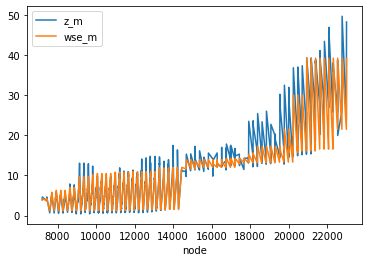

In [406]:
grid_wse_mean.plot(y=['z_m','wse_m'],kind='line')
# grid_wse_mean

In [226]:
grid_wse_mean
flood = np.zeros((nrow,ncol))
flood[(grid_wse_mean.row-1).astype(int), (grid_wse_mean.column-1).astype(int)] = grid_wse_mean.z_m

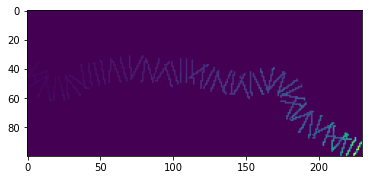

In [227]:
plt.imshow(flood)

In [290]:
from scipy.interpolate import interp2d, griddata
# f = interp2d(x, y, z, kind='linear')
out = griddata(points, z, (grid_p.loc[:,['row','column']].values)-1, method='linear')

In [294]:
out.shape
wse_grid_final[(grid_p.loc[:,['row']].values)-1,(grid_p.loc[:,['column']].values)-1].shape

(23000, 1)

In [318]:
np.zeros((len(out),1))[:,0] = out
# wse_grid_final[(grid_p.loc[:,['row']].values)-1,(grid_p.loc[:,['column']].values)-1]

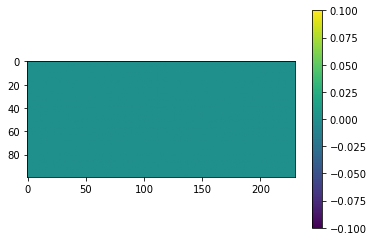

In [322]:
wse_grid_final = np.zeros((nrow,ncol))
wse_grid_final[(grid_p.loc[:,['row']].values)-1,(grid_p.loc[:,['column']].values)-1][:,0] = out
plt.imshow(wse_grid_final)
plt.colorbar()

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'linear' Variogram Model
Slope: 0.844303993597558
Nugget: 9.481028905192638e-15 



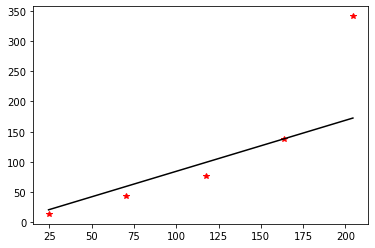

Calculating statistics on variogram model fit...


In [338]:
# Kriging
# linear, gaussian, spherical, exponential, hole-effect and power
OK = OrdinaryKriging(
    x,y, z,
    variogram_model="linear",
    verbose=True,
    enable_plotting=True,
    exact_values = True,
    enable_statistics = False,
    nlags = 5
)

In [339]:
# z is the kriged grid and ss is the variance grid (sigma ^2)
z, ss = OK.execute("grid", gridx, gridy)
# flip data because np sets 0,0 in top left while raster is bottom left
Z  = np.flip(z.data,axis = 0)
SS = np.flip(ss.data,axis = 0)
    

Executing Ordinary Kriging...



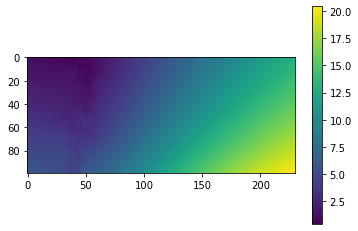

In [395]:
plt.imshow(z.data)
plt.colorbar()


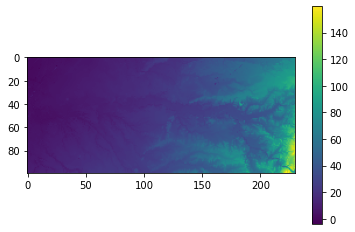

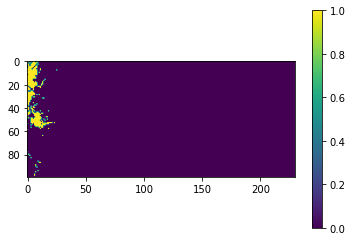

In [396]:
plt.imshow(dem_data)
plt.colorbar()

plt.show()
plt.imshow(z.data>dem_data)
plt.colorbar()


Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'linear' Variogram Model
Slope: 0.004642826660249623
Nugget: 2.3664227806731353e-13 



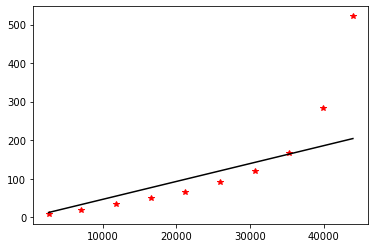

Calculating statistics on variogram model fit...


In [69]:
param='z_m'
df = gpd.read_file(filename)
df = df.dropna(subset=[param])
#     df = df.to_crs('epsg:32610')
    
#     df = gpd.sjoin(df,domain_buffered, op = 'within', how = 'inner')
res=200
x = df.geometry.x.values
y = df.geometry.y.values
z = df[param].values
gridx = np.arange(np.min(x), np.max(x), res)
gridy = np.arange(np.min(y), np.max(y), res)

# Kriging
# linear, gaussian, spherical, exponential, hole-effect and power
OK = OrdinaryKriging(
    x,y, z,
    variogram_model="linear",
    verbose=True,
    enable_plotting=True,
#     exact_values = False,
    enable_statistics = False,
    nlags = 1
)


In [70]:
# z is the kriged grid and ss is the variance grid (sigma ^2)
z, ss = OK.execute("grid", gridx, gridy)
# flip data because np sets 0,0 in top left while raster is bottom left
Z  = np.flip(z.data,axis = 0)
SS = np.flip(ss.data,axis = 0)
    

Executing Ordinary Kriging...



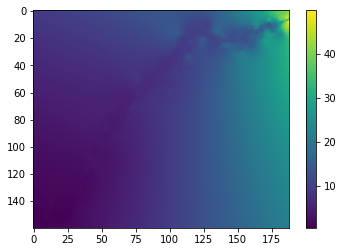

In [74]:
plt.imshow(Z)
plt.colorbar()

In [110]:
# filename = gis_dir+ 'wse_depth_points_'+str(Q_cfs)+'.shp'
# Z, SS = lin_krige(filename, param = 'z_m', res=200, flow=Q_cfs,out_dir = data_dir)

In [75]:
import scipy.spatial as sp  # for fast nearest neighbor search

def invdist(
    df,
    xcol,
    ycol,
    vcol,
    tmin,
    tmax,
    nx,
    xmn,
    xsiz,
    ny,
    ymn,
    ysiz,
    ndmin,
    ndmax,
    radius,
    power
):
    """ Inverse Distance to Python by Michael Pyrcz, the University of Texas at
    Austin (April, 2020).  Based on modification of the GSLIB kb2d program by Deutsch and Journel (1997)
    :param df: pandas DataFrame with the spatial data
    :param xcol: name of the x coordinate column
    :param ycol: name of the y coordinate column
    :param vcol: name of the property column
    :param tmin: property trimming limit
    :param tmax: property trimming limit
    :param nx: definition of the grid system (x axis)
    :param xmn: definition of the grid system (x axis)
    :param xsiz: definition of the grid system (x axis)
    :param ny: definition of the grid system (y axis)
    :param ymn: definition of the grid system (y axis)
    :param ysiz: definition of the grid system (y axis)
    :param ndmin: minimum number of data points to use for kriging a block
    :param ndmax: maximum number of data points to use for kriging a block
    :param radius: maximum isotropic search radius
    :param power: the inverse distance power
    :return:
    """
    
# Constants
    UNEST = -999.
    EPSLON = 1.0e-10
    VERSION = 0.1
        
# Load the data
    df_extract = df.loc[(df[vcol] >= tmin) & (df[vcol] <= tmax)]    # trim values outside tmin and tmax
    nd = len(df_extract)
    ndmax = min(ndmax,nd)
    x = df_extract[xcol].values
    y = df_extract[ycol].values
    vr = df_extract[vcol].values
    
# Allocate the needed memory:   
    xa = np.zeros(ndmax)
    ya = np.zeros(ndmax)
    vra = np.zeros(ndmax)
    dist = np.zeros(ndmax)
    nums = np.zeros(ndmax)
    s = np.zeros(ndmax)
    estmap = np.zeros((nx,ny))
    
# Make a KDTree for fast search of nearest neighbours   
    dp = list((y[i], x[i]) for i in range(0,nd))
    data_locs = np.column_stack((y,x))
    tree = sp.cKDTree(data_locs, leafsize=16, compact_nodes=True, copy_data=False, balanced_tree=True)

# Summary statistics for the data after trimming
    avg = vr.mean()
    stdev = vr.std()
    ss = stdev**2.0
    vrmin = vr.min()
    vrmax = vr.max()

# Initialize accumulators:
    rad2 = radius*radius

# MAIN LOOP OVER ALL THE BLOCKS IN THE GRID:
    nk = 0
    ak = 0.0
    vk = 0.0
    for iy in range(0,ny):
        yloc = ymn + (iy-0)*ysiz  
        for ix in range(0,nx):
            xloc = xmn + (ix-0)*xsiz
            current_node = (yloc,xloc)
        
# Find the nearest samples within each octant: First initialize
# the counter arrays:
            na = -1   # accounting for 0 as first index
            dist.fill(1.0e+20)
            nums.fill(-1)
            dist, nums = tree.query(current_node,ndmax) # use kd tree for fast nearest data search
            # remove any data outside search radius
            nums = nums[dist<radius]
            dist = dist[dist<radius] 
            nd = len(dist)        
            
# Is there enough samples?
            if nd < ndmin:   # accounting for min index of 0
                est  = UNEST
#                print('UNEST at ' + str(ix) + ',' + str(iy))  # option to include this error
            else:

# Put coordinates and values of neighborhood samples into xa,ya,vra:
                for ia in range(0,nd):
                    jj = int(nums[ia])
                    xa[ia]  = x[jj]
                    ya[ia]  = y[jj]
                    vra[ia] = vr[jj]
                    
# Solve for weights
                dist = np.sqrt((xa-xloc)*(xa-xloc) + (ya-yloc)*(ya-yloc)) 
                s = 1/((dist + EPSLON)**power)        # calculate inverse weights
                s = s / np.sum(s)             # constrain sum of the weights to 1.0 for unbiasedness
                est = 0.0                
                for ia in range(0,nd):
                    est = est + s[ia] * vra[ia]
                # this line causes issues if ny!=nx
            estmap[ny-iy-1,ix] = est

# Track the estimates
            if est > UNEST:
                nk = nk + 1
                ak = ak + est
                vk = vk + est*est

# END OF MAIN LOOP OVER ALL THE BLOCKS:

    if nk >= 1:
        ak = ak / float(nk)
        vk = vk/ float(nk) - ak*ak
        print('  Estimated   ' + str(nk) + ' blocks ')
        print('      average   ' + str(ak) + '  variance  ' + str(vk))

    return estmap


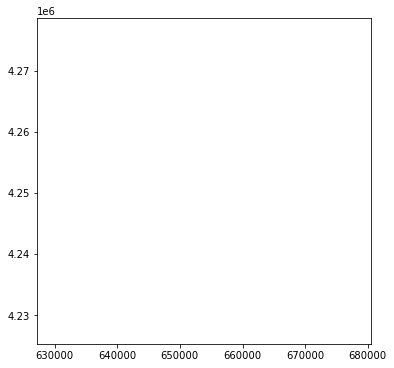

In [427]:
# fig,ax=plt.subplots(figsize=(6,6))
# for iy in range(0,ny):
#     yloc = ymin + (iy-0)*ysiz  
#     for ix in range(0,nx):
#         xloc = xmin + (ix-0)*xsiz
#         ax.plot(xloc,yloc)

In [416]:
wse_interp['x'] = wse_interp.geometry.x
wse_interp['y'] = wse_interp.geometry.y

# xmin = wse_interp.x.min()
# xmax = wse_interp.x.max()
# ymin = wse_interp.y.min()
# ymax = wse_interp.y.max()

xmin = grid_p.geometry.bounds.minx.min()
xmax = grid_p.geometry.bounds.maxx.max()
ymin = grid_p.geometry.bounds.miny.min()
ymax = grid_p.geometry.bounds.maxy.max()

cmap = plt.cm.plasma                    # color map
gw_min = wse_interp[param].min()
gw_max = wse_interp[param].max()

In [418]:
xlen = xmax-xmin
ylen = ymax-ymin
xsiz = 200
ysiz = 200
nx = xlen/xsiz
ny = ylen/ysiz
nx = np.ceil(nx).astype(int)
ny = np.ceil(ny).astype(int)
if nx>ny:
    ny = nx
else:
    nx=ny
# readjust xmax, ymax based on nx, ny
xmax = xmin + xsiz*nx
ymax = ymin + ysiz*ny

In [96]:
tmin = -9999.9; tmax = 9999.9; 
# nx = 100; xsiz = 10.0; xmn = mon_gpd.Easting.min()
# ny = 100; ysiz = 100.0; ymn = mon_gpd.Northing.min()

# nx = 100; xsiz = 200.0; xmn = f2013.x.min(); xmin = xmn - 0.1 * xsiz; xmax = xmin + nx * xsiz
# ny = 100; ysiz = 200.0; ymn = f2013.y.min(); ymin = ymn - 0.1 * ysiz; ymax = ymin + ny * ysiz

ndmin = 1; ndmax = 10
radius = 1000.0; power = 2

In [97]:
invdist_est = invdist(wse_interp,'x','y',param,tmin,tmax,nx,xmin,xsiz,ny,ymin,ysiz,ndmin,ndmax,radius,power)


  Estimated   25994 blocks 
      average   8.987812102534162  variance  73.99506799401674


In [107]:
import geostatspy.GSLIB as GSLIB                          # GSLIB utilities, viz and wrapped functions
import geostatspy.geostats as geostats                    # GSLIB converted to Python


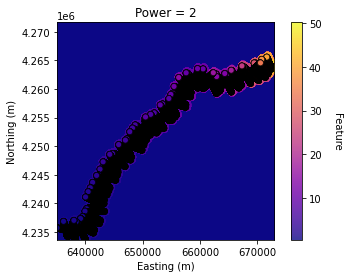

In [109]:
GSLIB.locpix_st(invdist_est,xmin,xmax,ymin,ymax,xsiz,gw_min,gw_max,
                wse_interp,'x','y',param,'Power = 2','Easting (m)','Northing (m)','Feature',cmap)


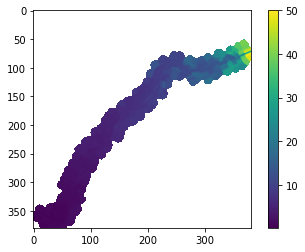

ValueError: operands could not be broadcast together with shapes (380,380) (100,230) 

In [409]:
Z_id = np.ma.masked_where(invdist_est==-999,invdist_est)
plt.imshow(Z_id)
plt.colorbar()
plt.show()
plt.imshow(Z_id>dem_data)
plt.show()

In [117]:
from rasterio.transform import Affine
res = 100
transform = Affine.translation(np.min(x) - res / 2, np.max(y) - res / 2) * Affine.scale(res, -res)
transform

Affine(100.0, 0.0, 634960.7575334122,
       0.0, -100.0, 4265526.691178155)

In [198]:
new_dataset = rasterio.open(data_dir+'/interpolated_flood_depths/'+param+'_at_'+str(Q_cfs)+'_kriged.tif',
                           'w',driver = 'GTiff',
                           height=Z.shape[0], width = Z.shape[1],
                           count = 1, dtype = Z.dtype,
                           crs = wse_interp.crs,
                            nodatavals = -999.,
                           transform = transform)

new_dataset.write(Z.data,1)
new_dataset.close()

In [167]:
coordinate_list = [(x,y) for x,y in zip(grid_p.geometry.centroid.x , grid_p.geometry.centroid.y)]


In [202]:
new_dataset = rasterio.open(data_dir+'/interpolated_flood_depths/'+param+'_at_'+str(Q_cfs)+'_kriged.tif',
                           'r',driver = 'GTiff')

In [206]:
new_dataset.meta
new_dataset

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 380,
 'height': 380,
 'count': 1,
 'crs': CRS.from_epsg(32610),
 'transform': Affine(100.0, 0.0, 634960.7575334122,
        0.0, -100.0, 4265526.691178155)}

In [173]:
temp = rasterio.sample.sample_gen(new_dataset, coordinate_list, indexes=None)
new_dataset.close()

In [190]:
# os.path.exists(raster_path)
coordinate_list[0:2]

[(629688.4003886183, 4239783.597748351),
 (629809.0419861673, 4239943.114534115)]

In [201]:
raster_path = data_dir+'/interpolated_flood_depths/'+param+'_at_'+str(Q_cfs)+'_kriged.tif'
with rasterio.open(raster_path) as src:
    [sample[0] for sample in src.sample(coordinate_list[0:2])]
#     print(src.sample(coordinate_list[0]))

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [200]:
raster_path = data_dir+'/interpolated_flood_depths/'+param+'_at_'+str(Q_cfs)+'_kriged.tif'
with rasterio.open(raster_path) as src:
    grid_p['values'] = [sample[0] for sample in src.sample(coordinate_list)]

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

<AxesSubplot:>

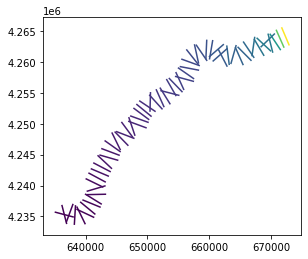

In [55]:
# take each XS and set every point in it as the WSE elevation for that XS
# could spatial join transg to model grid then use those polygons for interpolation?
# then linearly interpolate between XS in the raster
transg['wse_m'] = xs_levee_smooth.min()+depths
transg.plot('wse_m')

# scipy grid data can take points and convert them into a raster

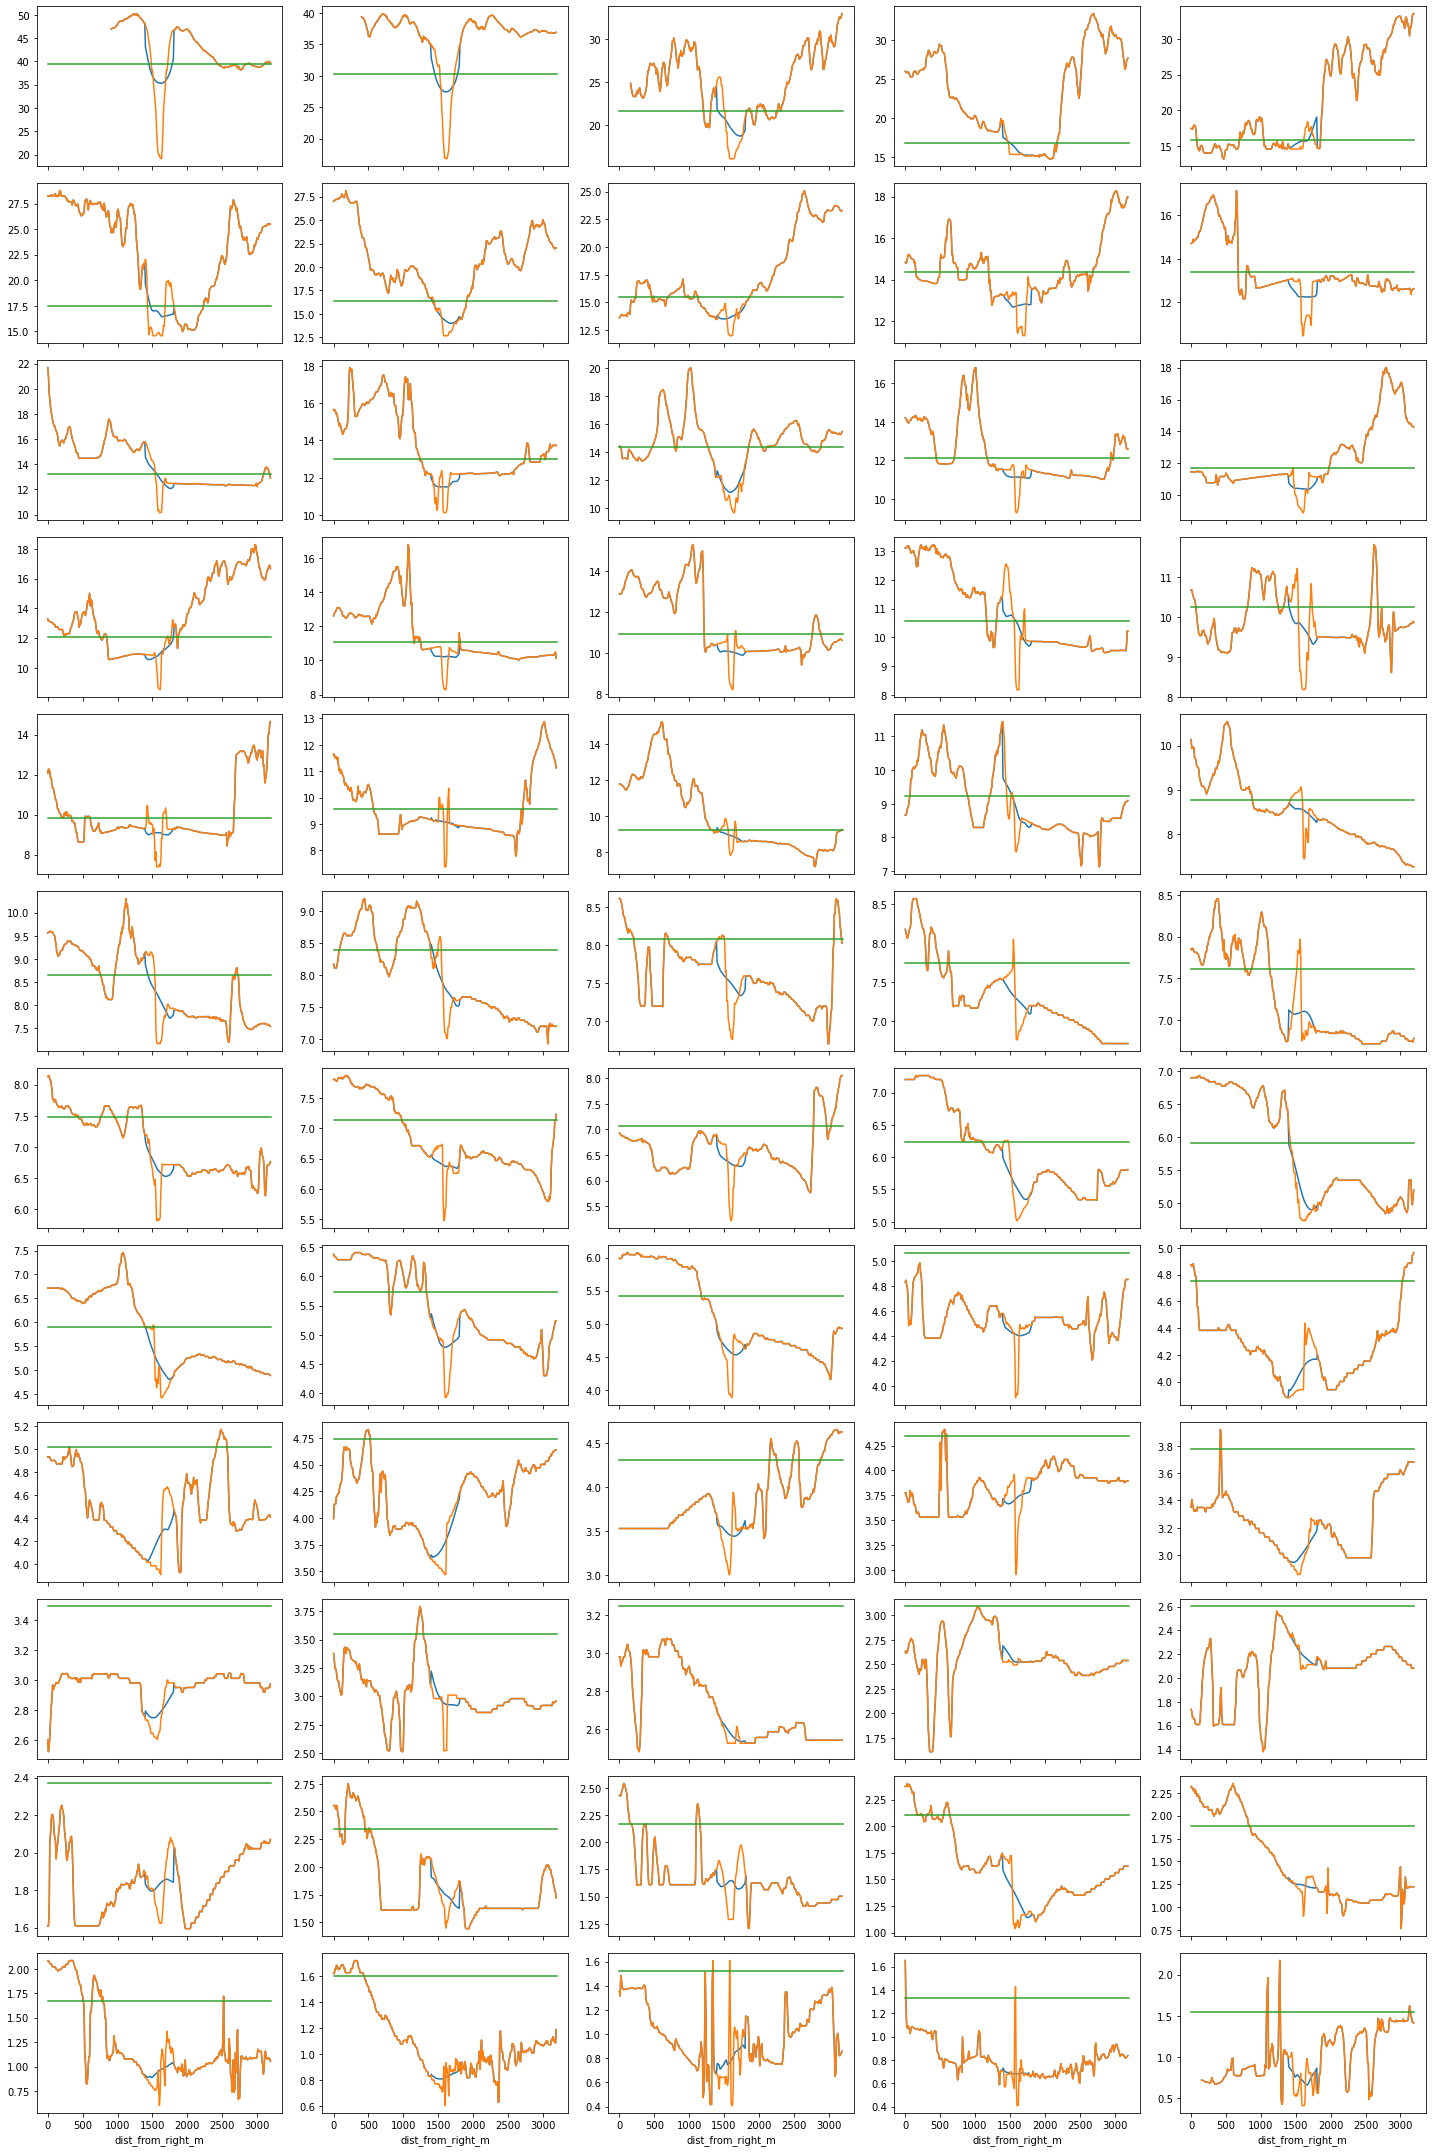

In [521]:
nx,ny = 12,5
fig,ax = plt.subplots(nx,ny, figsize=(20,30),sharex=True, sharey=True)
n=0
for i in np.arange(0,nx):
    for j in np.arange(0,ny):
        xs_levee_smooth.iloc[:,n].plot(ax=ax[i,j])
        xs_all_df.iloc[:,n].plot(ax=ax[i,j])
        ws = xs_levee_smooth.iloc[:,n].min() +depths[n]
        ax[i,j].plot([0,3200],[ws,ws])
        n+=1
fig.tight_layout()
plt.savefig('upstream to downstream XS original then smoothed then flood depth for' +str(Q_cfs)+ 'cfs.png')

Text(0.5, 0, 'Setback distance (m)')

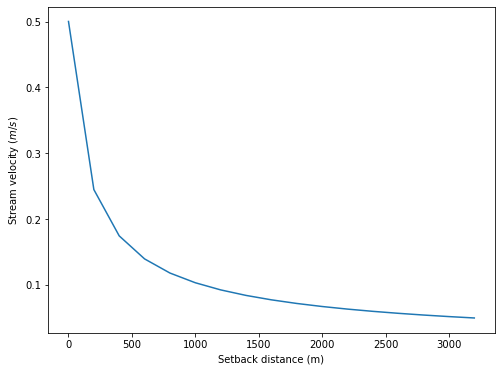

In [40]:
# n = 0.1
# s = grid_sfr.slope.mean()
# fig,ax = plt.subplots(figsize=(8,6))
# flow = (1/n)*(hr**(2/3))*np.sqrt(s)
# plt.plot(setbacks,flow)
# plt.ylabel('Stream velocity ($m/s$)')
# plt.xlabel('Setback distance (m)')

# plt.savefig('stream velocity by setback.png',dpi=600)